In [197]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 100

In [198]:
df_sales = pd.read_csv("df_sales.csv")
df_inv = pd.read_csv("df_inventory.csv")
df_cust = pd.read_csv("df_cust.csv")

In [199]:
## Omzet proportion per chain
## Total sales performance day by day
## Weekly sales trend  
## Food spoilage rate 
## Food spoilage in value
## Most popular product
## Least popular product
## Most profitable product
## Customer segment

> # __Sales__

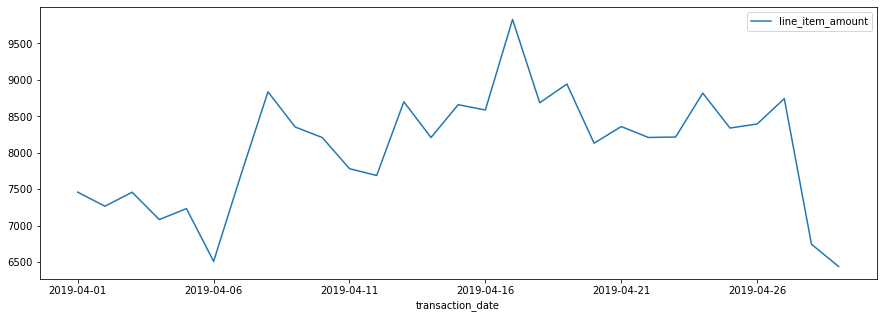

In [200]:
df_daily_sales = df_sales[['transaction_date','product_group','line_item_amount']]
df_daily_sales.groupby(['transaction_date']).sum().plot(figsize=(15,5))

In [201]:
s = pd.date_range('2019-04-01', '2019-04-30', freq='D').to_series()
day = {'transaction_date' : s,
       'day' : s.dt.dayofweek }

day_ = pd.DataFrame(day)
day_['transaction_date'] = day_['transaction_date'].astype('str')

In [202]:
day_.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2019-04-01 to 2019-04-30
Freq: D
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   transaction_date  30 non-null     object
 1   day               30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 2.0+ KB


In [203]:
df_daily_sales = pd.merge(df_daily_sales, day_, on=['transaction_date'], how='inner')
df_daily_sales['day'].unique()

array([0, 1, 2, 3, 4, 5, 6])

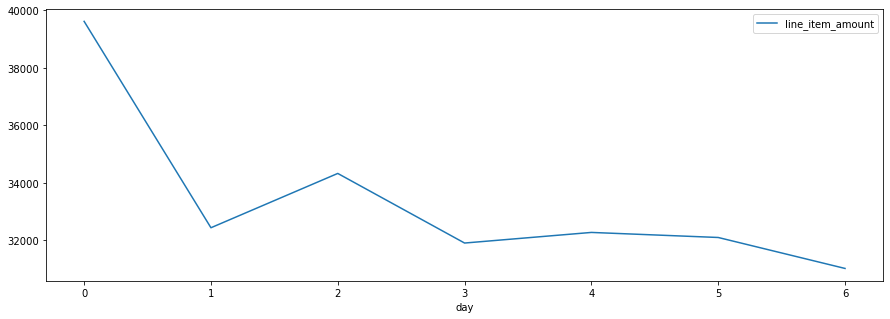

In [204]:
df_daily_sales.groupby(['day']).sum().plot(figsize=(15,5))

# 0 = monday
# 6 = sunday

In [205]:
day_['transaction_date'] = pd.to_datetime(day_['transaction_date'])
day_.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2019-04-01 to 2019-04-30
Freq: D
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  30 non-null     datetime64[ns]
 1   day               30 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.0 KB


<Figure size 1080x360 with 0 Axes>

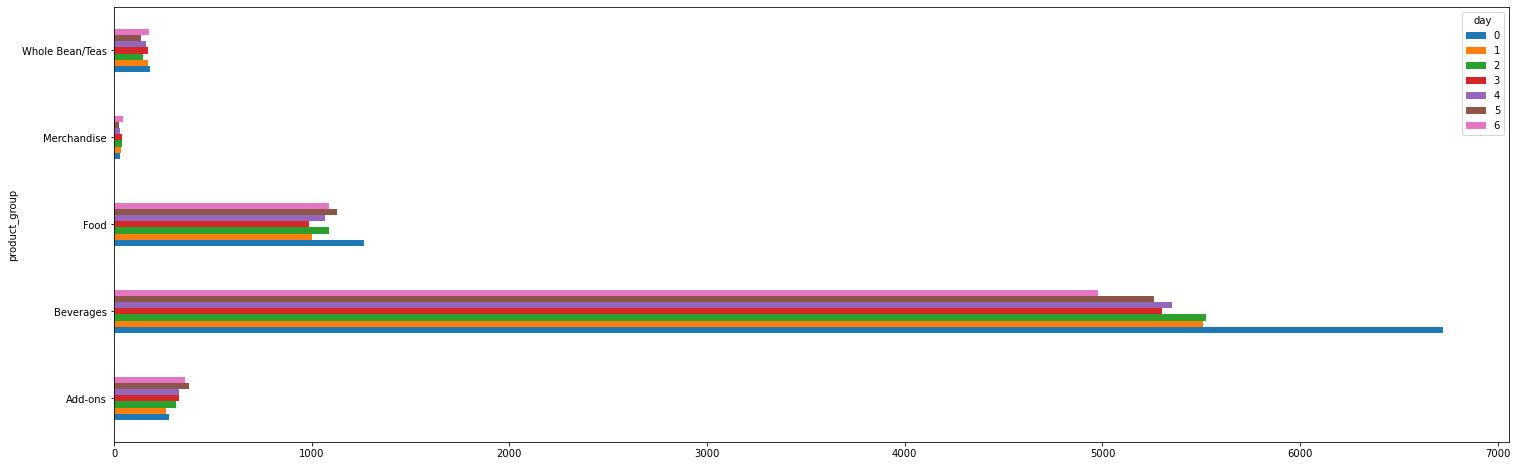

In [206]:
plt.figure(figsize=(15,5))
pd.crosstab(index=df_daily_sales['product_group'], columns=df_daily_sales['day']).plot(kind='barh', figsize=(25,8))

In [207]:
df_sales['transaction_date'] = pd.to_datetime(df_sales['transaction_date'])

In [208]:
df_sales['week'] = df_sales['transaction_date'].dt.week
df_sales['week'].unique()

/Users/ndaru/opt/anaconda3/envs/python37/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


array([14, 15, 16, 17, 18])

In [210]:
df_sales = pd.merge(df_sales, day_, on=['transaction_date'], how='inner')
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49894 entries, 0 to 49893
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           49894 non-null  int64         
 1   transaction_date         49894 non-null  datetime64[ns]
 2   transaction_time         49894 non-null  object        
 3   sales_outlet_id          49894 non-null  int64         
 4   customer_id              49894 non-null  int64         
 5   instore_yn               49894 non-null  object        
 6   order                    49894 non-null  int64         
 7   product_id               49894 non-null  int64         
 8   quantity                 49894 non-null  int64         
 9   line_item_amount         49894 non-null  float64       
 10  unit_price               49894 non-null  float64       
 11  promo_item_yn            49894 non-null  object        
 12  product_group            49894 n

In [211]:
df_sales.to_csv("df_sales_with_day.csv")

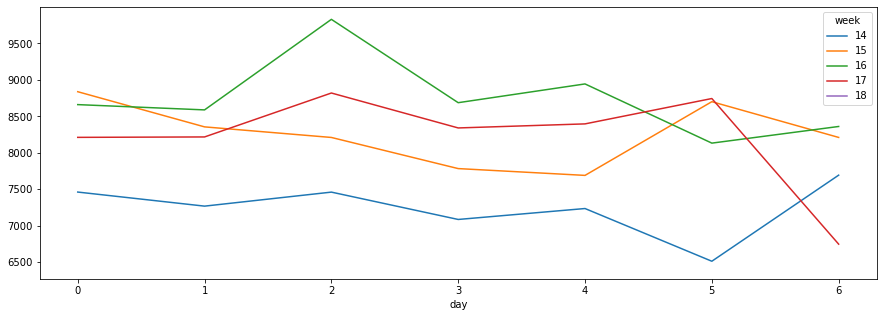

In [125]:
df_sales.groupby(['day','week']).sum()['line_item_amount'].unstack().plot(figsize=(15,5))

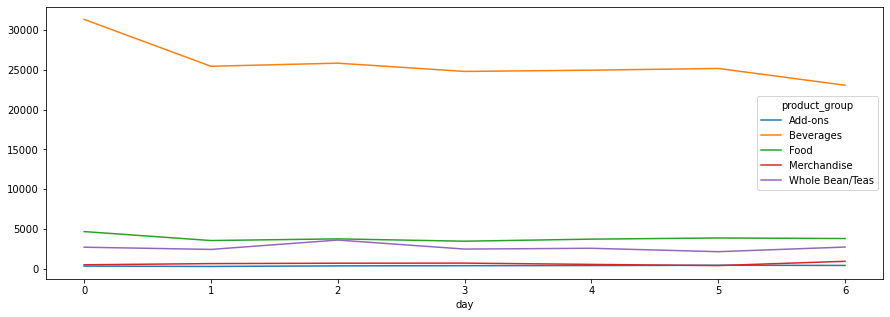

In [127]:
df_sales.groupby(['day','product_group']).sum()['line_item_amount'].unstack().plot(figsize=(15,5))

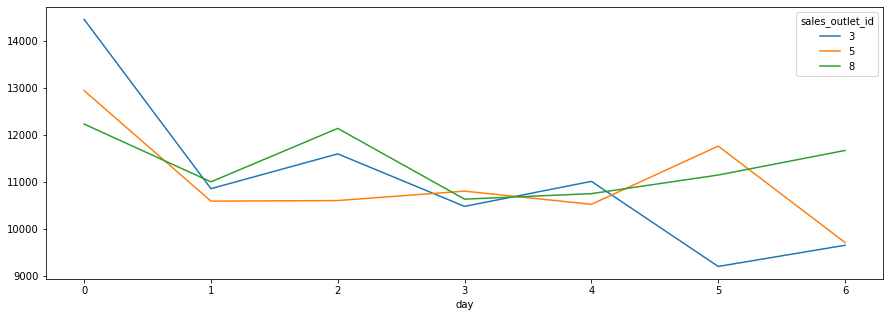

In [131]:
df_sales.groupby(['day','sales_outlet_id']).sum()['line_item_amount'].unstack().plot(figsize=(15,5))

In [129]:
df_sales.groupby(['day','product']).sum()['line_item_amount'].sort_values(ascending=False).head(10)

day  product                     
2    Civet Cat                       1800.00
0    Sustainably Grown Organic Lg    1349.00
     Dark chocolate Lg               1215.00
     Latte Rg                        1177.25
     Cappuccino Lg                   1139.00
     Latte                           1080.00
4    Latte Rg                        1066.75
2    Dark chocolate Lg               1035.00
0    Jamaican Coffee River Lg        1031.25
4    Dark chocolate Lg               1026.00
Name: line_item_amount, dtype: float64

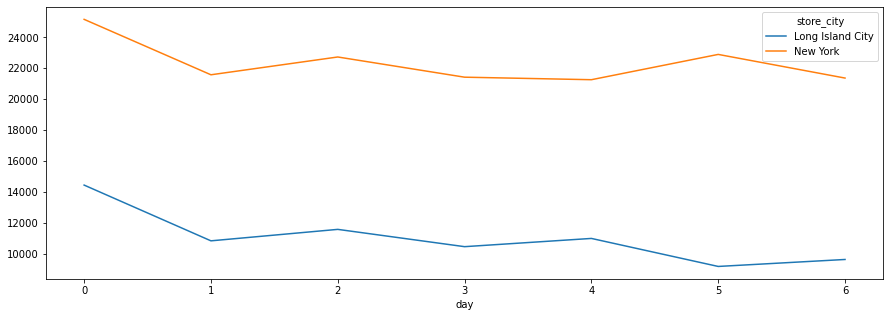

In [132]:
df_sales.groupby(['day','store_city']).sum()['line_item_amount'].unstack().plot(figsize=(15,5))

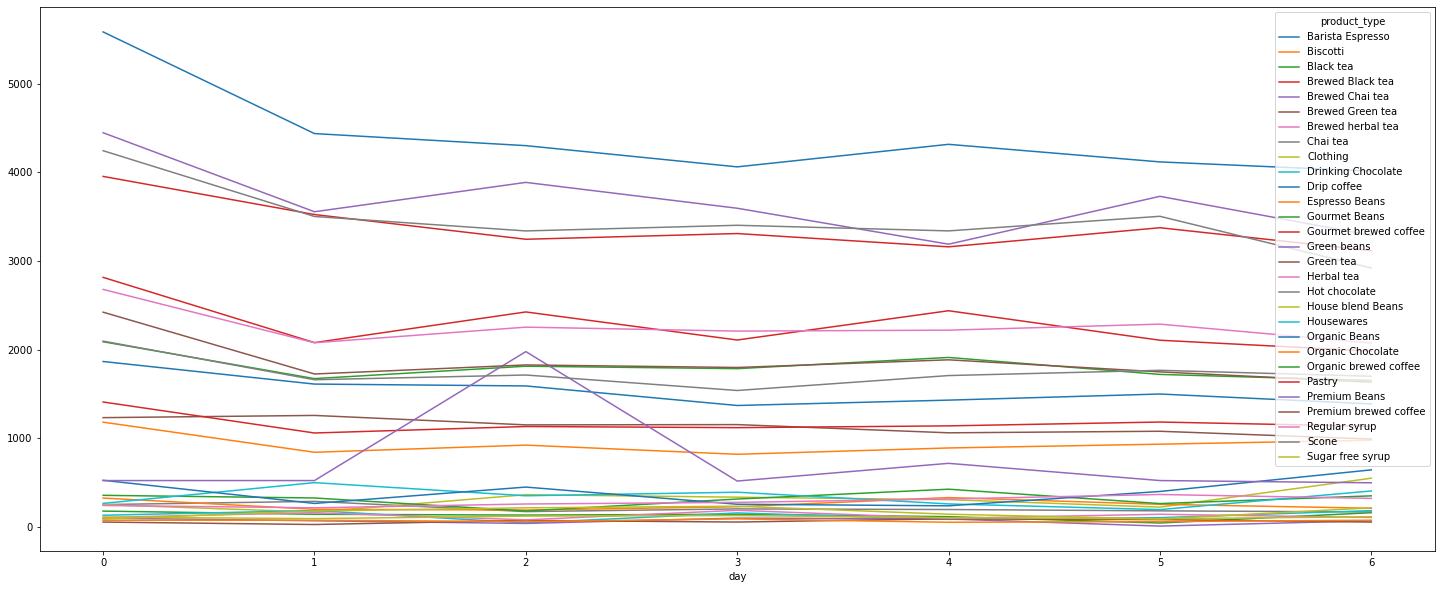

In [148]:
df_sales.groupby(['day','product_type']).sum()['line_item_amount'].unstack().plot(figsize=(25,10))

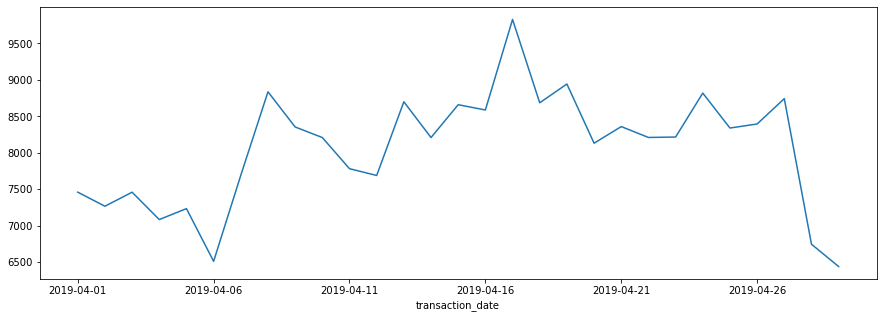

In [149]:
# df_sales.groupby(['transaction_date']).sum()['line_item_amount'].unstack().plot(figsize=(15,5))

df_daily_sales.groupby(['transaction_date']).sum()['line_item_amount'].plot(figsize=(15,5))

In [187]:
df_daily_sales['line_item_amount'].sum()

233635.95

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49894 entries, 0 to 49893
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           49894 non-null  int64  
 1   transaction_date         49894 non-null  object 
 2   transaction_time         49894 non-null  object 
 3   sales_outlet_id          49894 non-null  int64  
 4   customer_id              49894 non-null  int64  
 5   instore_yn               49894 non-null  object 
 6   order                    49894 non-null  int64  
 7   product_id               49894 non-null  int64  
 8   quantity                 49894 non-null  int64  
 9   line_item_amount         49894 non-null  float64
 10  unit_price               49894 non-null  float64
 11  promo_item_yn            49894 non-null  object 
 12  product_group            49894 non-null  object 
 13  product_category         49894 non-null  object 
 14  product_type          

> # __Customer__

In [5]:
df_cust.head()

,customer_id,home_store,customer_name,loyalty_card_number,gender,birth_year,generation,work,member_duration,member_month_joined,office,total_spending,count(line_item_amount),avg_spending,member_for
0,1,3,Kelly Key,908-424-2890,M,1950,Baby Boomers,edu,2017,2017-01,adipiscing,29.20,8,3.650000,28
1,2,3,Clark Schroeder,032-732-6308,M,1950,Baby Boomers,gov,2017,2017-01,fames,90.35,21,4.302381,28
2,3,3,Elvis Cardenas,459-375-9187,M,1950,Baby Boomers,edu,2017,2017-01,tellus,188.90,31,6.093548,28
3,4,3,Rafael Estes,576-640-9226,M,1950,Baby Boomers,gov,2017,2017-01,non,28.75,9,3.194444,27
4,301,3,Alika Rivas,021-443-0682,F,1950,Baby Boomers,us,2017,2017-01,aliquam,58.60,16,3.662500,28


In [6]:
df_cust['age'] = 2019-df_cust['birth_year']
df_cust.head()

,customer_id,home_store,customer_name,loyalty_card_number,gender,birth_year,generation,work,member_duration,member_month_joined,office,total_spending,count(line_item_amount),avg_spending,member_for,age
0,1,3,Kelly Key,908-424-2890,M,1950,Baby Boomers,edu,2017,2017-01,adipiscing,29.20,8,3.650000,28,69
1,2,3,Clark Schroeder,032-732-6308,M,1950,Baby Boomers,gov,2017,2017-01,fames,90.35,21,4.302381,28,69
2,3,3,Elvis Cardenas,459-375-9187,M,1950,Baby Boomers,edu,2017,2017-01,tellus,188.90,31,6.093548,28,69
3,4,3,Rafael Estes,576-640-9226,M,1950,Baby Boomers,gov,2017,2017-01,non,28.75,9,3.194444,27,69
4,301,3,Alika Rivas,021-443-0682,F,1950,Baby Boomers,us,2017,2017-01,aliquam,58.60,16,3.662500,28,69


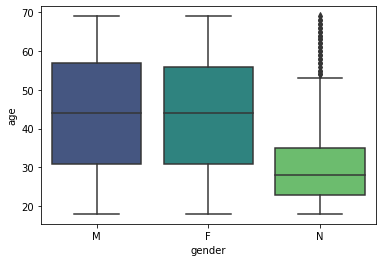

In [30]:
sns.boxplot(x='gender', y='age', data=df_cust, palette='viridis')

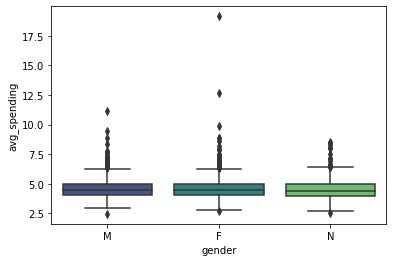

In [31]:
sns.boxplot(x='gender', y='avg_spending', data=df_cust, palette='viridis')

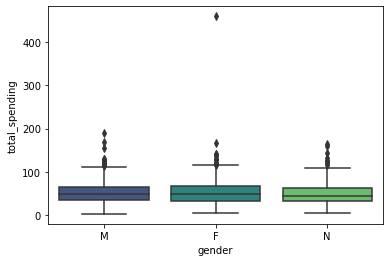

In [32]:
sns.boxplot(x='gender', y='total_spending', data=df_cust, palette='viridis')

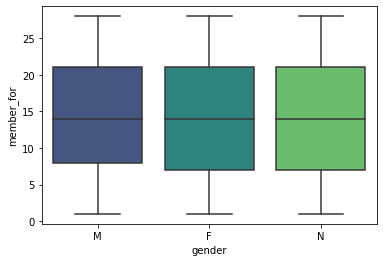

In [33]:
sns.boxplot(x='gender', y='member_for', data=df_cust, palette='viridis')

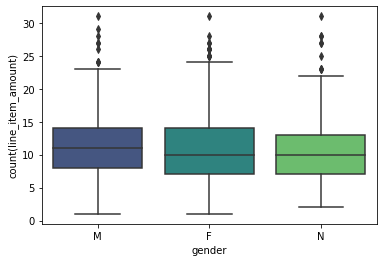

In [81]:
sns.boxplot(x='gender', y='count(line_item_amount)', data=df_cust, palette='viridis')

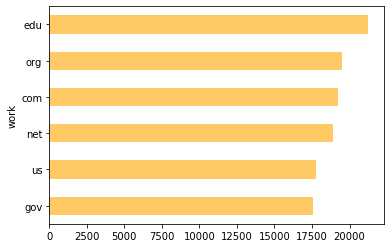

In [59]:
df_cust.groupby(['work'])['total_spending'].sum().sort_values(ascending=True).plot(kind='barh', color='orange', alpha=0.6)

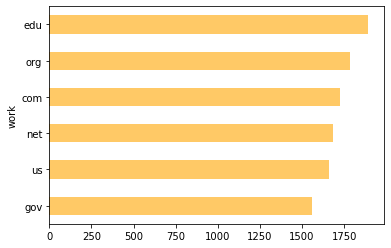

In [58]:
df_cust.groupby(['work'])['avg_spending'].sum().sort_values(ascending=True).plot(kind='barh', color='orange', alpha=0.6)

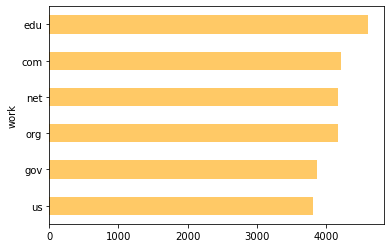

In [78]:
df_cust.groupby(['work'])['count(line_item_amount)'].sum().sort_values(ascending=True).plot(kind='barh', color='orange', alpha=0.6)

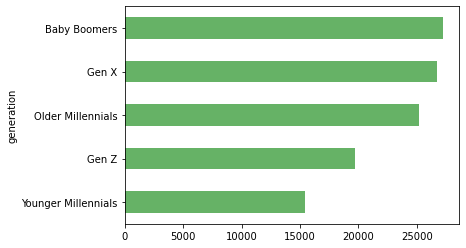

In [60]:
df_cust.groupby(['generation'])['total_spending'].sum().sort_values(ascending=True).plot(kind='barh', color='green', alpha=0.6)

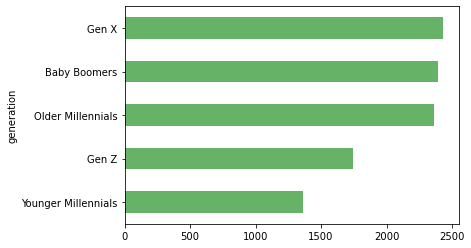

In [61]:
df_cust.groupby(['generation'])['avg_spending'].sum().sort_values(ascending=True).plot(kind='barh', color='green', alpha=0.6)

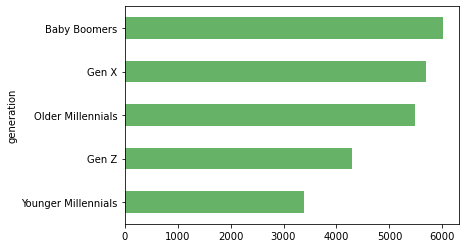

In [76]:
df_cust.groupby(['generation'])['count(line_item_amount)'].sum().sort_values(ascending=True).plot(kind='barh', color='green', alpha=0.6)

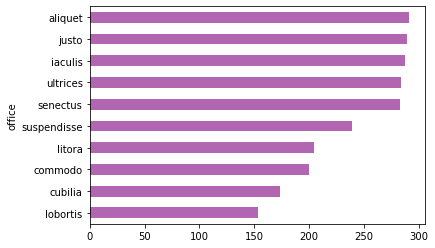

In [65]:
df_cust.groupby(['office'])['total_spending'].sum().sort_values(ascending=True).head(10).plot(kind='barh', color='purple', alpha=0.6)

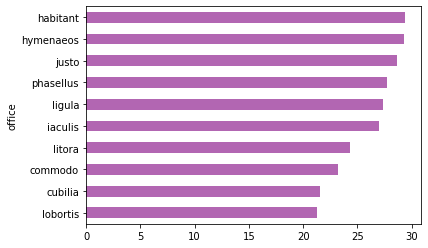

In [66]:
df_cust.groupby(['office'])['avg_spending'].sum().sort_values(ascending=True).head(10).plot(kind='barh', color='purple', alpha=0.6)

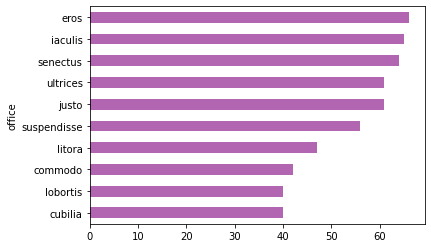

In [80]:
df_cust.groupby(['office'])['count(line_item_amount)'].sum().sort_values(ascending=True).head(10).plot(kind='barh', color='purple', alpha=0.6)

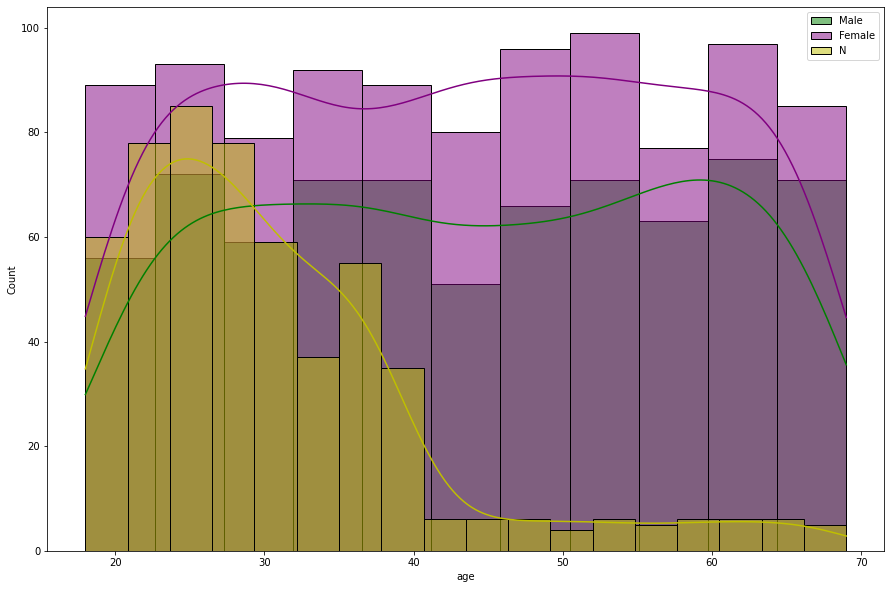

In [29]:
plt.figure(figsize=(15,10))
sns.histplot(df_cust[df_cust['gender']=='M']['age'], kde=True, color='', label='Male')
sns.histplot(df_cust[df_cust['gender']=='F']['age'], kde=True,color='purple', label='Female')
sns.histplot(df_cust[df_cust['gender']=='N']['age'], kde=True,color='y', label='N')
plt.legend()

In [191]:
df_cust[df_cust['member_for']>1].count()

customer_id                2176
home_store                 2176
customer_name              2176
loyalty_card_number        2176
gender                     2176
birth_year                 2176
generation                 2176
work                       2176
member_duration            2176
member_month_joined        2176
office                     2176
total_spending             2176
count(line_item_amount)    2176
avg_spending               2176
member_for                 2176
dtype: int64

In [193]:
len(df_cust)-df_cust[df_cust['member_for']>1].count()

customer_id                69
home_store                 69
customer_name              69
loyalty_card_number        69
gender                     69
birth_year                 69
generation                 69
work                       69
member_duration            69
member_month_joined        69
office                     69
total_spending             69
count(line_item_amount)    69
avg_spending               69
member_for                 69
dtype: int64

In [188]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2245 entries, 0 to 2244
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              2245 non-null   int64  
 1   home_store               2245 non-null   int64  
 2   customer_name            2245 non-null   object 
 3   loyalty_card_number      2245 non-null   object 
 4   gender                   2245 non-null   object 
 5   birth_year               2245 non-null   int64  
 6   generation               2245 non-null   object 
 7   work                     2245 non-null   object 
 8   member_duration          2245 non-null   int64  
 9   member_month_joined      2245 non-null   object 
 10  office                   2245 non-null   object 
 11  total_spending           2245 non-null   float64
 12  count(line_item_amount)  2245 non-null   int64  
 13  avg_spending             2245 non-null   float64
 14  member_for              

In [75]:
# num_col = df_cust.select_dtypes(include=['int','float']).columns
num_col = df_cust.select_dtypes(include=['int','float']).columns
num_col = df_cust[num_col]
num_col.describe()
# sns.heatmap(num_col, annot=True)

,customer_id,home_store,birth_year,member_duration,total_spending,count(line_item_amount),avg_spending,member_for,age
count,2245.000000,2245.000000,2245.000000,2245.000000,2245.000000,2245.000000,2245.000000,2245.000000,2245.000000
mean,4285.166592,4.956793,1978.389310,2017.682405,50.904334,11.069933,4.589446,14.239198,40.610690
std,3088.579515,1.852975,14.927778,0.677679,25.642248,4.824090,0.923655,7.843857,14.927778
min,1.000000,3.000000,1950.000000,2017.000000,2.450000,1.000000,2.450000,1.000000,18.000000
25%,562.000000,3.000000,1965.000000,2017.000000,33.250000,8.000000,4.038462,7.000000,28.000000
50%,5323.000000,5.000000,1981.000000,2018.000000,47.000000,10.000000,4.435714,14.000000,38.000000
75%,5884.000000,5.000000,1991.000000,2018.000000,65.250000,14.000000,4.950000,21.000000,54.000000
max,8501.000000,8.000000,2001.000000,2019.000000,459.750000,31.000000,19.156250,28.000000,69.000000


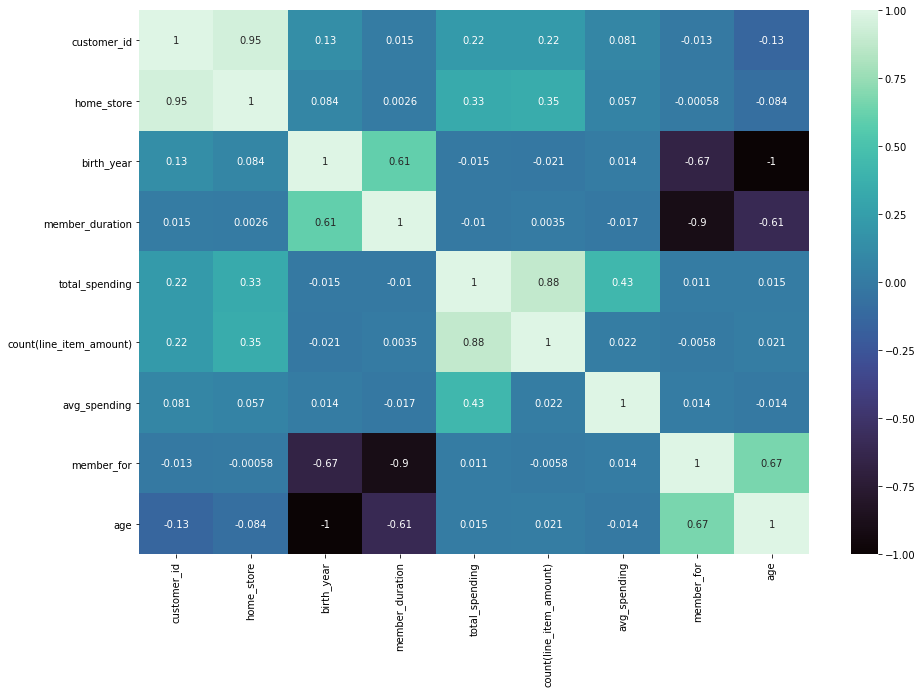

In [84]:
plt.figure(figsize=(15,10))
sns.heatmap(num_col.corr(),annot=True,cmap='mako')


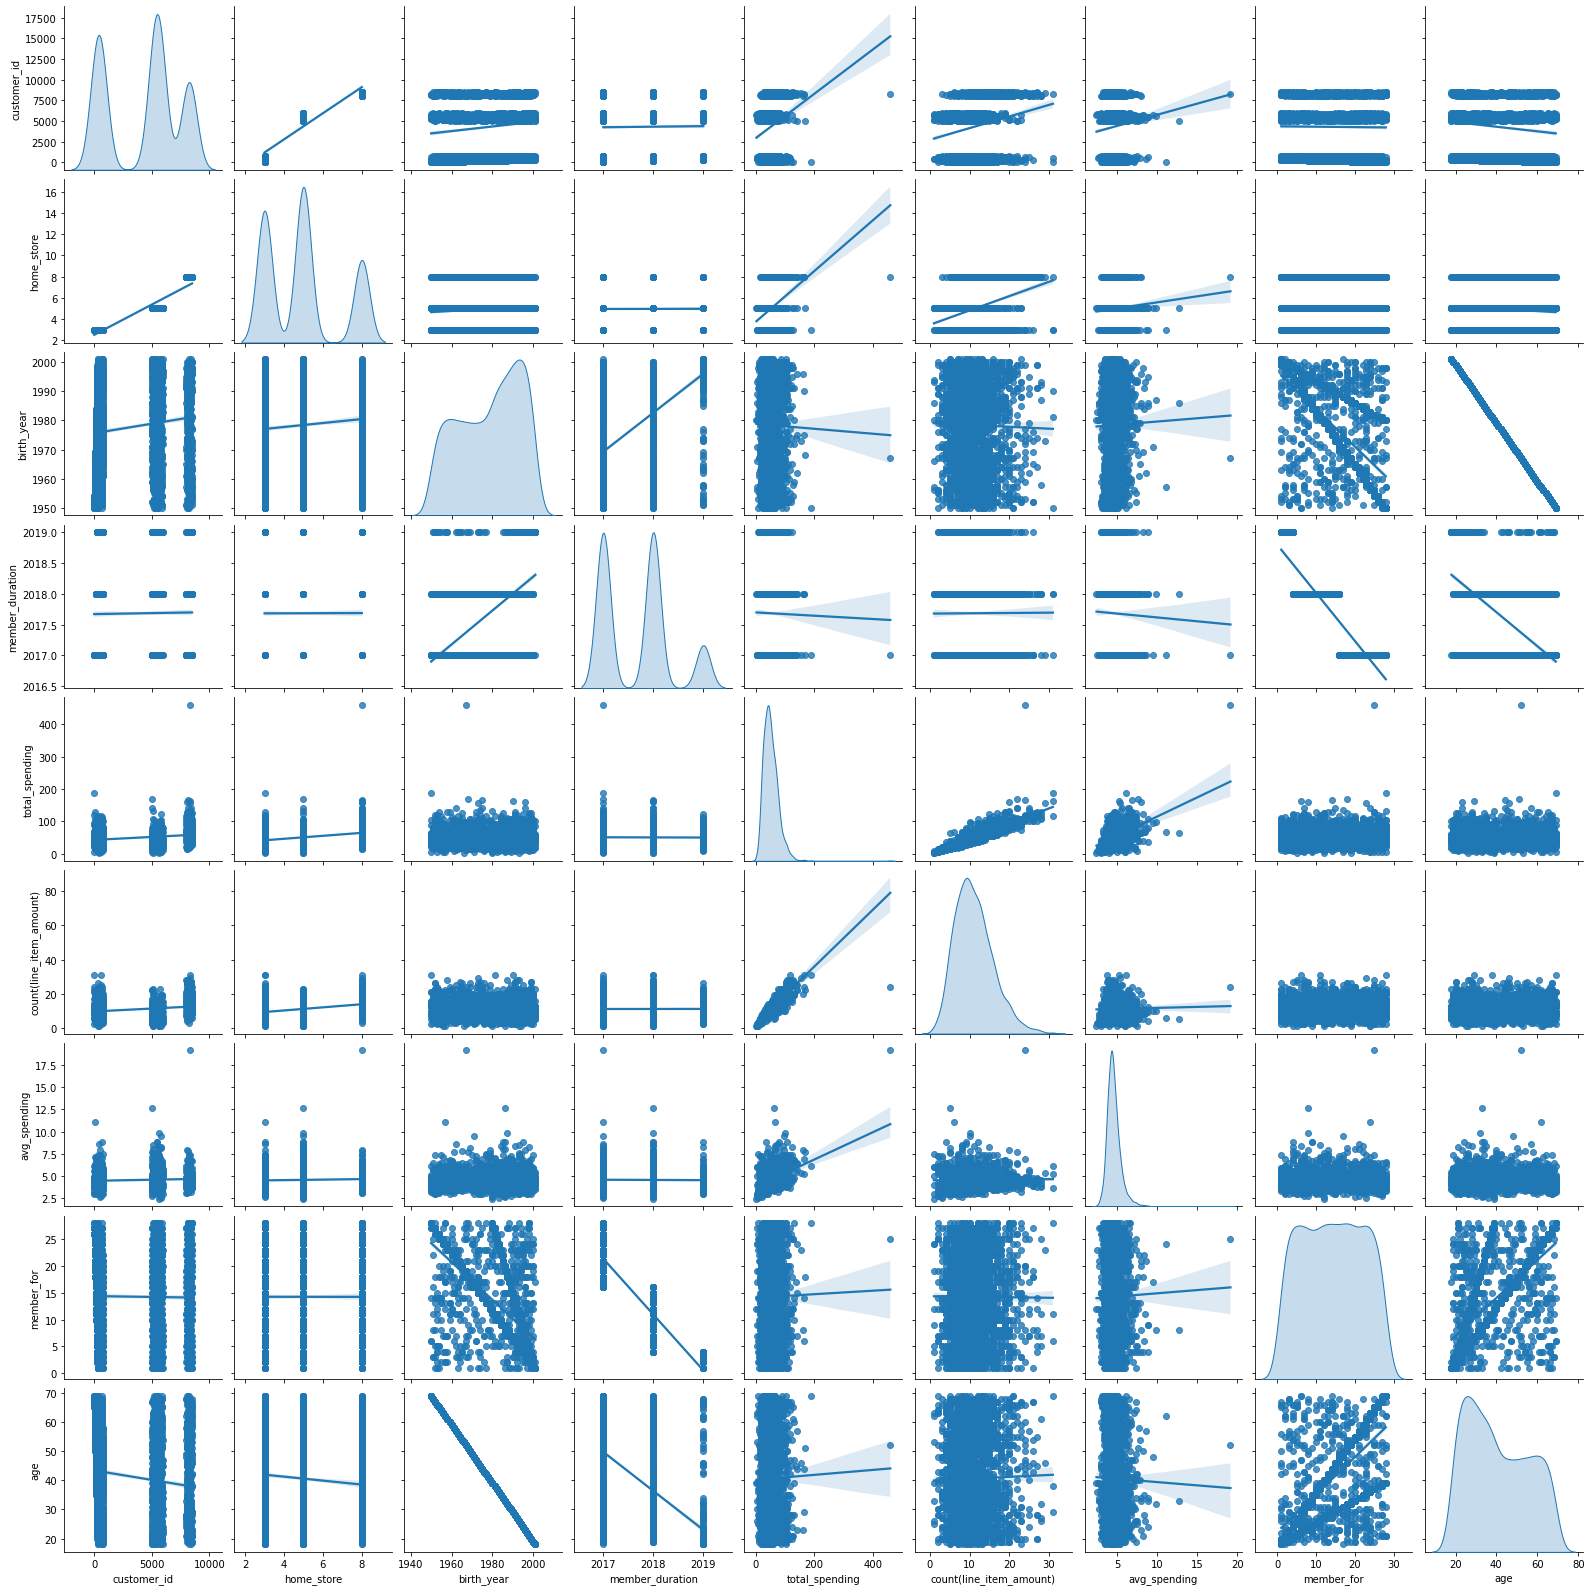

In [85]:
sns.pairplot(num_col, palette='rocket', kind='reg', diag_kind='kde')

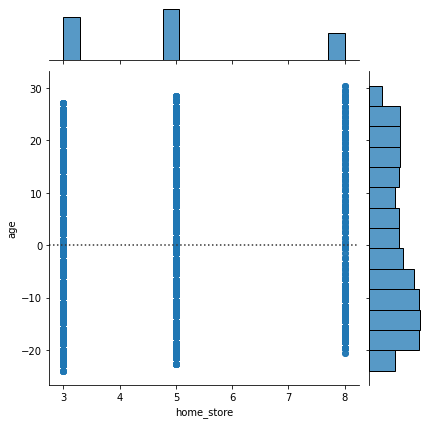

In [93]:
sns.jointplot(x=df_cust['home_store'], y=df_cust['age'], kind='resid')

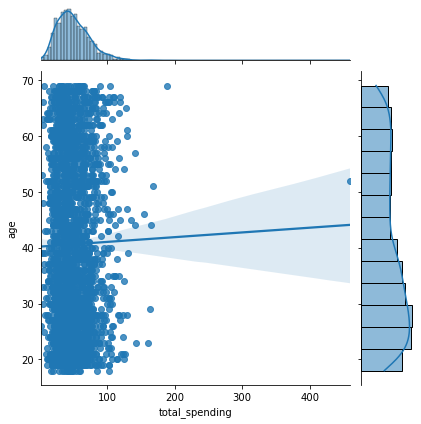

In [91]:
sns.jointplot(x=df_cust['total_spending'], y=df_cust['age'], kind='reg')

> # Inventory

In [165]:

df_inv['transaction_date'] = pd.to_datetime(df_inv['transaction_date']).head()
df_inv2 = pd.merge(df_inv, day_, on=['transaction_date'], how='inner')

In [166]:
df_inv2.head()

,sales_outlet_id,transaction_date,product_id,start_of_day,quantity_sold,waste,percent_waste,product_category,product_type,product,current_wholesale_price,current_retail_price,store_city,neighborhood,day
0,3,2019-04-01,69,18,8,10,56,Bakery,Biscotti,Hazelnut Biscotti,2.28,3.5,Long Island City,Astoria,0
1,3,2019-04-02,69,18,7,11,61,Bakery,Biscotti,Hazelnut Biscotti,2.28,3.5,Long Island City,Astoria,1
2,3,2019-04-03,69,18,8,10,56,Bakery,Biscotti,Hazelnut Biscotti,2.28,3.5,Long Island City,Astoria,2
3,3,2019-04-04,69,18,10,8,44,Bakery,Biscotti,Hazelnut Biscotti,2.28,3.5,Long Island City,Astoria,3
4,3,2019-04-05,69,18,0,0,0,Bakery,Biscotti,Hazelnut Biscotti,2.28,3.5,Long Island City,Astoria,4


In [154]:
df_inv['product_id'].unique()

array([69, 70, 71, 72, 73])

In [185]:
df_inv['current_retail_price'].unique()

array([3.5 , 3.25, 3.75])

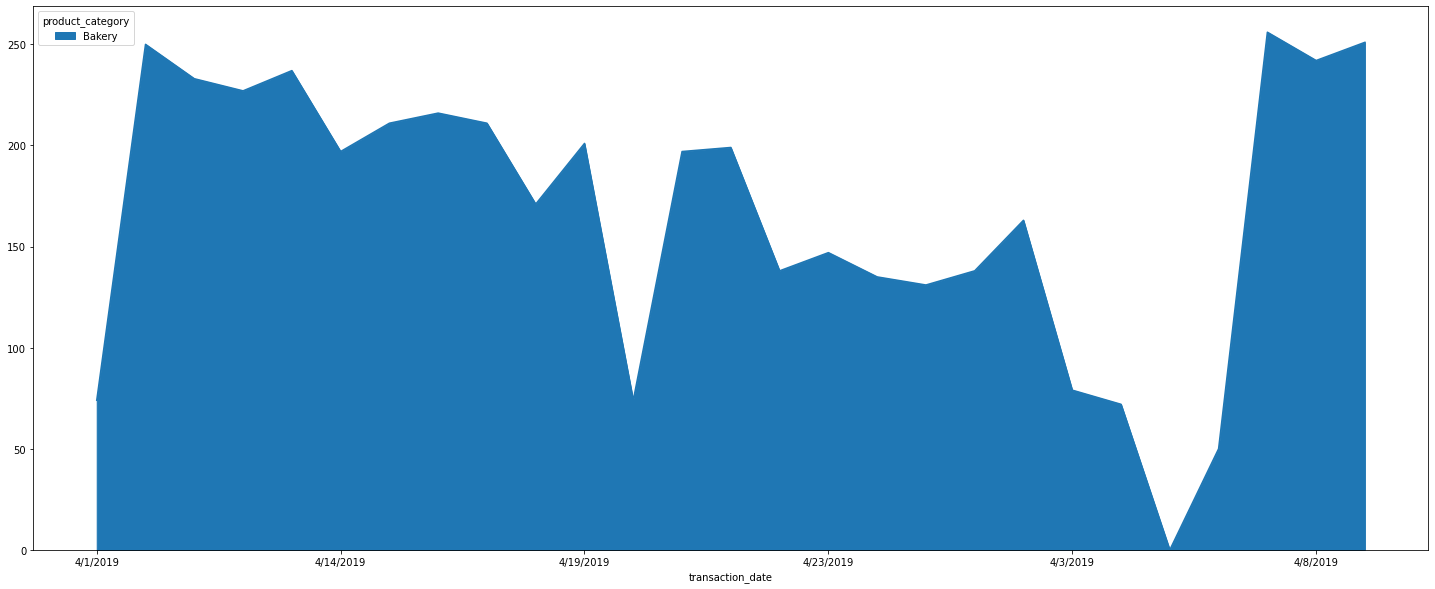

In [179]:
df_inv.groupby(['transaction_date','product_category']).sum()['waste'].unstack().plot(figsize=(25,10), kind='area')

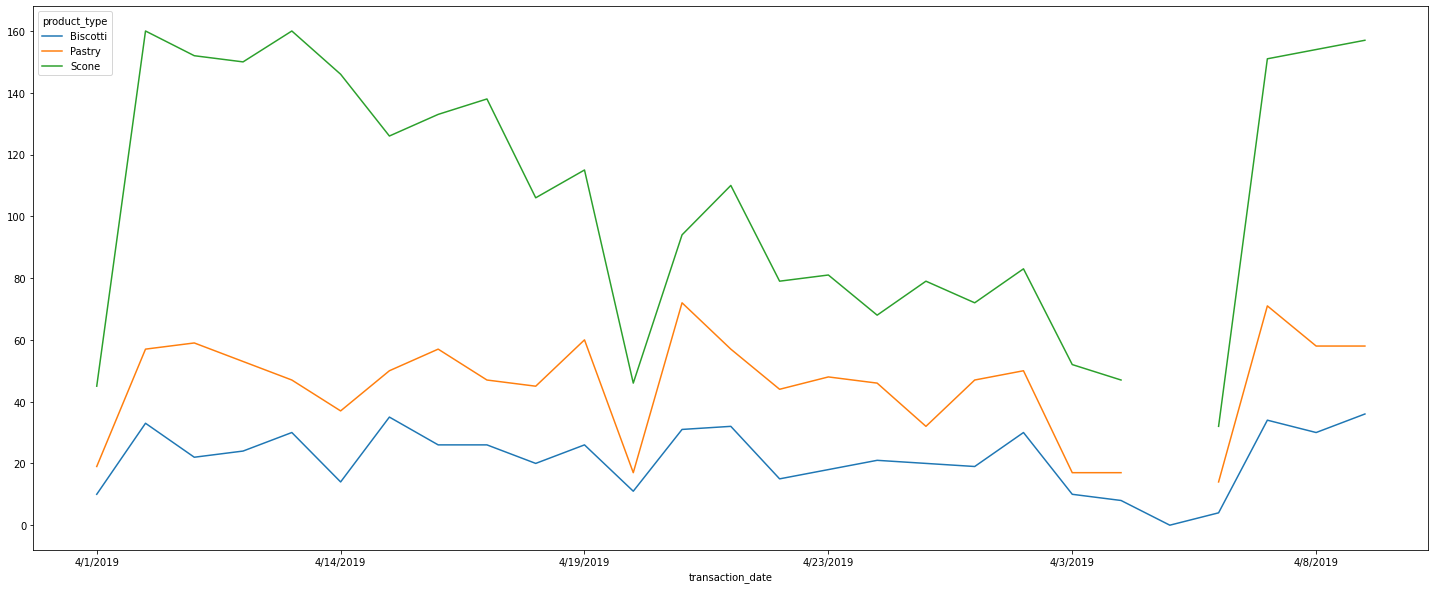

In [155]:
df_inv.groupby(['transaction_date','product_type']).sum()['waste'].unstack().plot(figsize=(25,10))

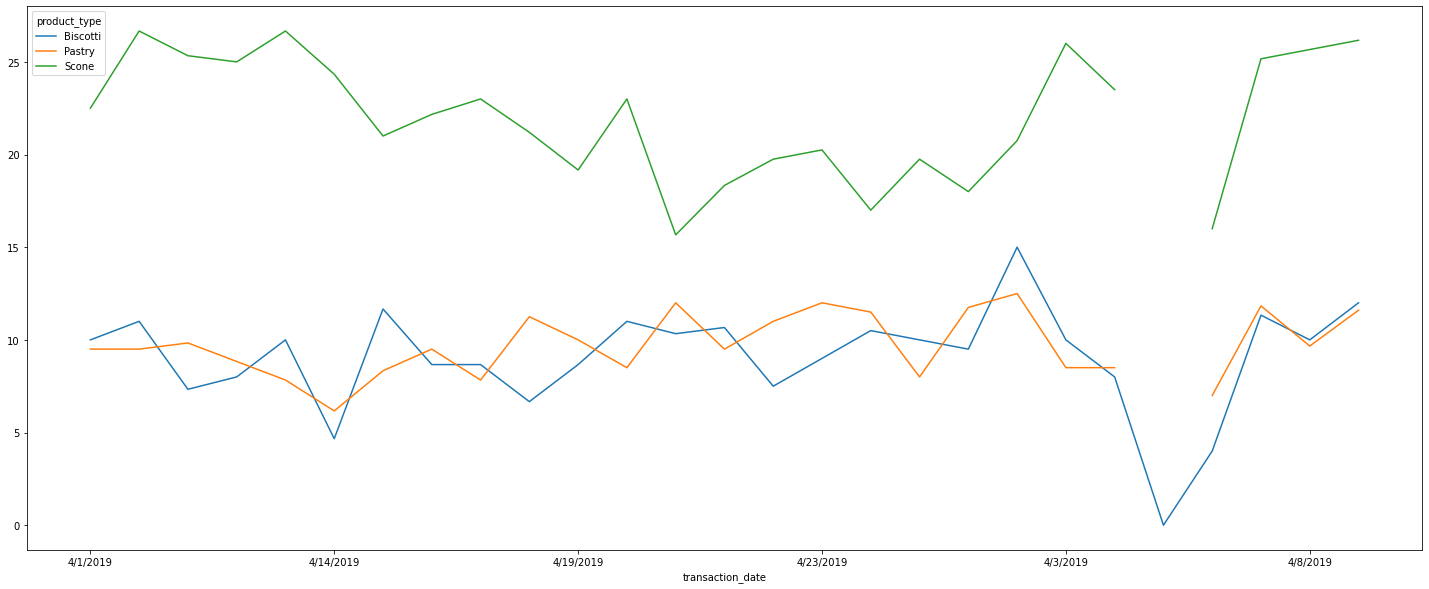

In [182]:
df_inv.groupby(['transaction_date','product_type']).mean()['waste'].unstack().plot(figsize=(25,10))

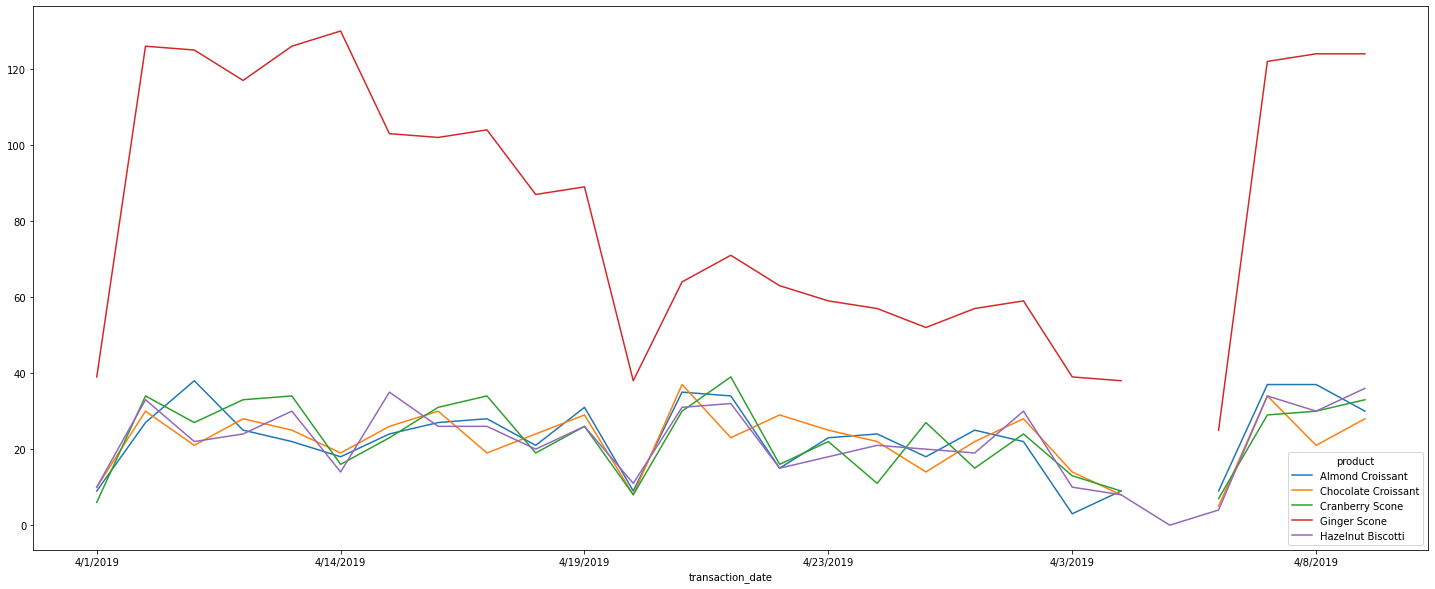

In [178]:
df_inv.groupby(['transaction_date','product']).sum()['waste'].unstack().plot(figsize=(25,10))

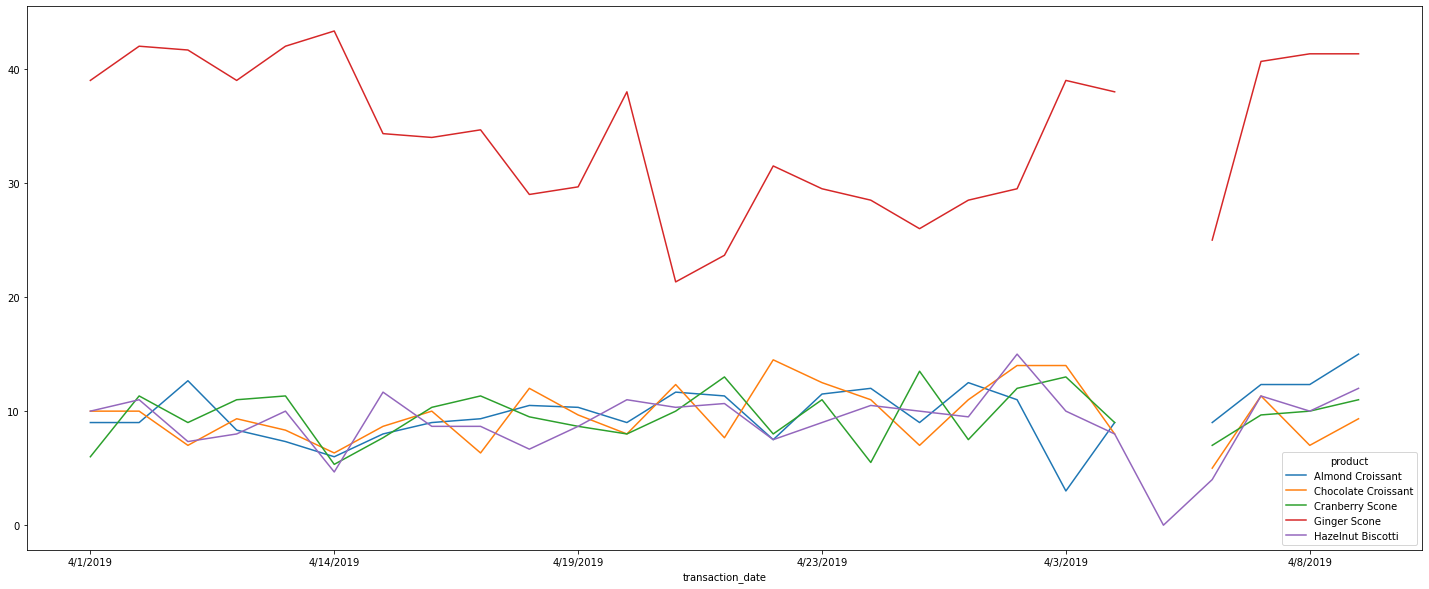

In [183]:
df_inv.groupby(['transaction_date','product']).mean()['waste'].unstack().plot(figsize=(25,10))

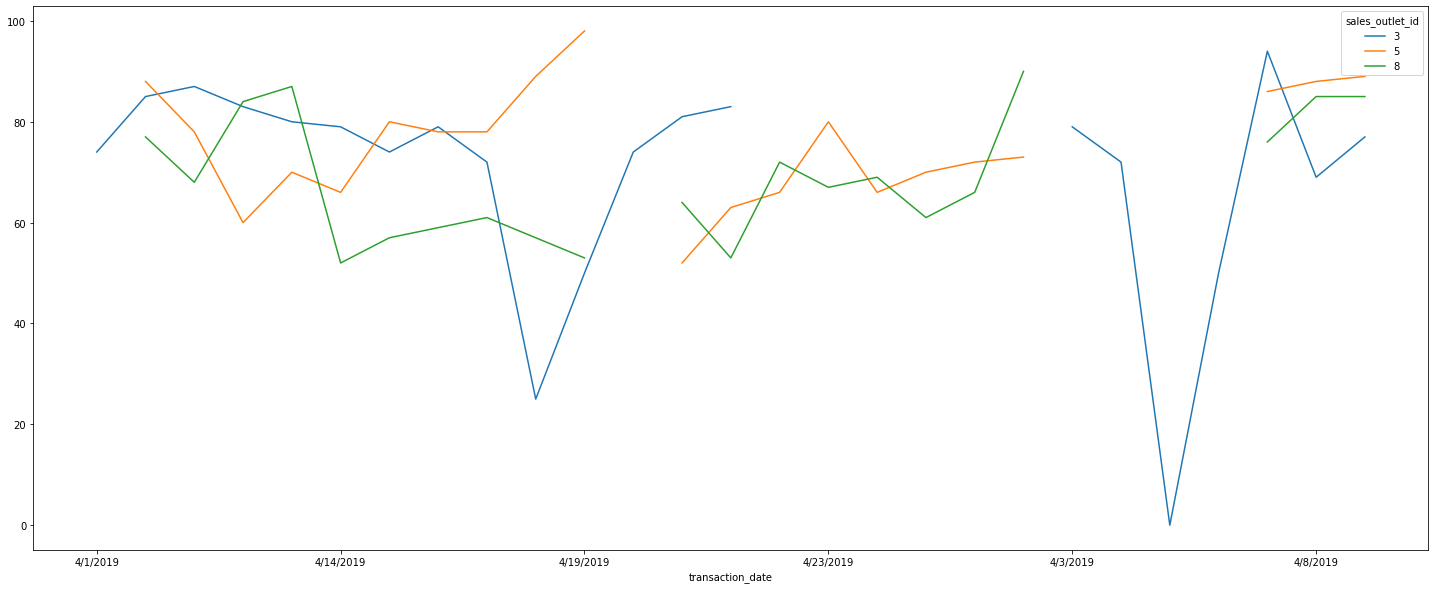

In [181]:
df_inv.groupby(['transaction_date','sales_outlet_id']).sum()['waste'].unstack().plot(figsize=(25,10))

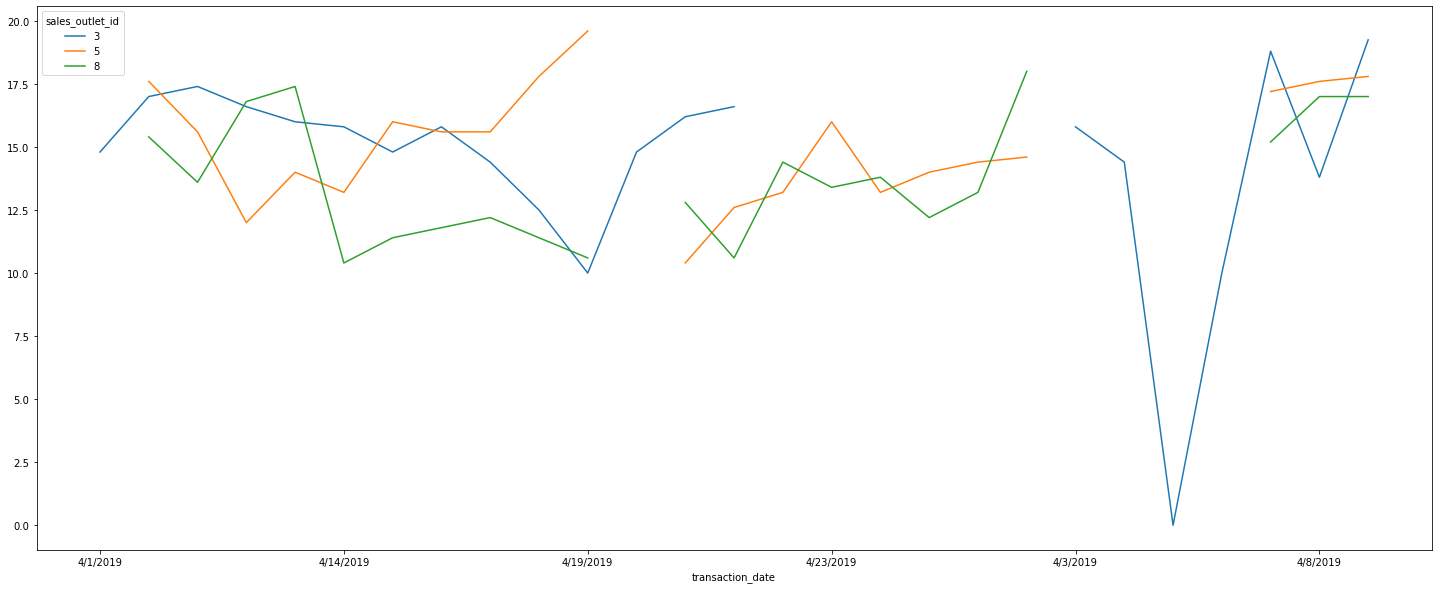

In [184]:
df_inv.groupby(['transaction_date','sales_outlet_id']).mean()['waste'].unstack().plot(figsize=(25,10))

> # Inferential Statistic